## Dataset Description:
The dataset consists of images of various flowers available in the online floral shop's inventory.

#### Source:

The images are collected internally by capturing photographs of flowers available in the online floral shop. The dataset is obtained from Kaggle. It is available by the name Oxford 102 Flower Dataset. (https://www.kaggle.com/datasets/nunenuh/pytorch-challange-flower-dataset?resource=download&select=README.md)

#### Topic/Domain:

The dataset falls between the category of flower recognition system.

#### Features:

The dataset consists of image data. The images consist of 102 different flower types. The dataset is divided into:

    - Training Set (102 folders with 40 to 258 images of each flower)
    - Validation set (102 folders with 10 to 40 images of each flower)
    - Testing set (102 folders with 3-15 images of each flower)
    - A cat_to_name.json file where numbers are mapped to unique flowers


    


In [ ]:
#Importing Libraries here

In [16]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
import os
import matplotlib.pyplot as plt
import torch
import numpy as np
from torch import nn
from torch import optim
from torchvision import datasets, models, transforms
import torch.nn.functional as F
import torch.utils.data 
import pandas as pd
from collections import OrderedDict
from PIL import Image
import seaborn as sns
from torch.utils.data import Dataset
import json

### Data Preprocessing

Data preprocessing of image data involves a series of steps to prepare the raw image data for training a machine learning model. A set of transformations were applied to the images:

1. **Random Rotation (30 degrees)**:
   - This transformation randomly rotates the image by a maximum of 30 degrees in either a clockwise or counterclockwise direction. Random rotation helps in augmenting the dataset, introducing variations that can improve the model's learning.

2. **Random Resized Crop (224x224)**:
   - Randomly crops and resizes the image to a size of 224x224 pixels. 

3. **Random Horizontal Flip**:
   - This transformation randomly flips the image horizontally with a 50% probability. Horizontal flipping creates additional variations to the training data and helps the model become more efficient in classifying.

4. **ToTensor**:
   - Converts the image into a PyTorch tensor. PyTorch tensors are arrays similar to NumPy arrays but optimized for image computations. Converting images to tensors is a prerequisite for training neural networks with PyTorch.

5. **Normalize**:
   - Normalizes the tensor values of the image using the provided mean and standard deviation values along each channel (RGB).
   - The mean `[0.485, 0.456, 0.406]` and standard deviation `[0.229, 0.224, 0.225]` are commonly used values computed from a large dataset.
   - Normalization standardizes the pixel values, bringing them to a common scale which speeds up the training process.

In [17]:
#Data Preprocessing

In [18]:
#Training Image Data

In [19]:
train_data_transforms = transforms.Compose([ transforms.RandomRotation (30),
                                             transforms.RandomResizedCrop (224),
                                             transforms.RandomHorizontalFlip (),
                                             transforms.ToTensor (),
                                             transforms.Normalize ([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
                                            ])
train_image_datasets = datasets.ImageFolder ('dataset/train', transform = train_data_transforms)

In [20]:
train_loader = torch.utils.data.DataLoader(train_image_datasets, batch_size = 64, shuffle = True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


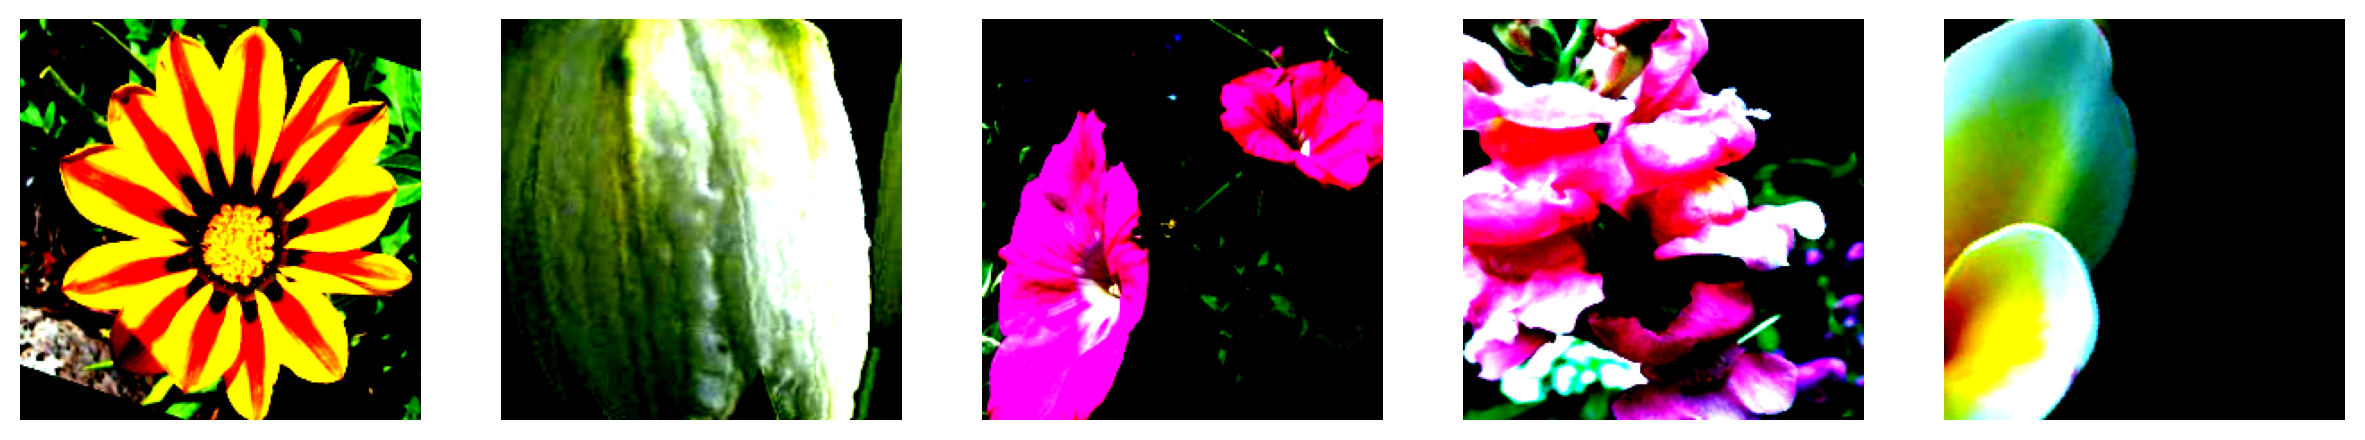

In [21]:
batch = next(iter(train_loader))
images, labels = batch

# Converting tensor images to numpy arrays to display a few images
images = images.numpy()
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(np.transpose(images[i], (1, 2, 0))) 
    plt.axis('off')
plt.show()

In [8]:
#Validating Image Data

In [22]:
valid_data_transforms = transforms.Compose ([transforms.Resize (255),
                         transforms.CenterCrop (224),
                         transforms.ToTensor (),
                         transforms.Normalize ([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
                         ])
valid_image_datasets = datasets.ImageFolder ('dataset/valid', transform = valid_data_transforms)

In [23]:
valid_loader = torch.utils.data.DataLoader(valid_image_datasets, batch_size = 64, shuffle = True)

In [24]:
#Testing Image Data

In [25]:
test_data_transforms = transforms.Compose([transforms.Resize (255),
                        transforms.CenterCrop (224),
                        transforms.ToTensor (),
                        transforms.Normalize ([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
                        ])
test_image_datasets = datasets.ImageFolder('dataset/test', transform = test_data_transforms)

In [26]:
test_loader = torch.utils.data.DataLoader(test_image_datasets, batch_size = 64, shuffle = True)

In [27]:
inputs, labels = next(iter(train_loader))
print(inputs[0][0])
print(inputs.size())
#The inputs.size() give us some infotmation about the image data, each batch size is 128, there are 3 color channels (RGB) 
# and 224 and 224 are the dimensions

tensor([[-0.8507, -0.8164, -0.7822,  ..., -2.1179, -2.1179, -2.1179],
        [-0.7993, -0.7822, -0.7479,  ..., -2.1179, -2.1179, -2.1179],
        [-0.7479, -0.7308, -0.6794,  ..., -2.1179, -2.1179, -2.1179],
        ...,
        [-2.1179, -2.1179, -2.1179,  ..., -1.2445, -1.5699, -1.8097],
        [-2.1179, -2.1179, -2.1179,  ..., -1.1760, -1.4672, -1.7069],
        [-2.1179, -2.1179, -2.1179,  ..., -1.1247, -1.4158, -1.6555]])
torch.Size([64, 3, 224, 224])


In [28]:
train_image_datasets.class_to_idx

{'1': 0,
 '10': 1,
 '100': 2,
 '101': 3,
 '102': 4,
 '11': 5,
 '12': 6,
 '13': 7,
 '14': 8,
 '15': 9,
 '16': 10,
 '17': 11,
 '18': 12,
 '19': 13,
 '2': 14,
 '20': 15,
 '21': 16,
 '22': 17,
 '23': 18,
 '24': 19,
 '25': 20,
 '26': 21,
 '27': 22,
 '28': 23,
 '29': 24,
 '3': 25,
 '30': 26,
 '31': 27,
 '32': 28,
 '33': 29,
 '34': 30,
 '35': 31,
 '36': 32,
 '37': 33,
 '38': 34,
 '39': 35,
 '4': 36,
 '40': 37,
 '41': 38,
 '42': 39,
 '43': 40,
 '44': 41,
 '45': 42,
 '46': 43,
 '47': 44,
 '48': 45,
 '49': 46,
 '5': 47,
 '50': 48,
 '51': 49,
 '52': 50,
 '53': 51,
 '54': 52,
 '55': 53,
 '56': 54,
 '57': 55,
 '58': 56,
 '59': 57,
 '6': 58,
 '60': 59,
 '61': 60,
 '62': 61,
 '63': 62,
 '64': 63,
 '65': 64,
 '66': 65,
 '67': 66,
 '68': 67,
 '69': 68,
 '7': 69,
 '70': 70,
 '71': 71,
 '72': 72,
 '73': 73,
 '74': 74,
 '75': 75,
 '76': 76,
 '77': 77,
 '78': 78,
 '79': 79,
 '8': 80,
 '80': 81,
 '81': 82,
 '82': 83,
 '83': 84,
 '84': 85,
 '85': 86,
 '86': 87,
 '87': 88,
 '88': 89,
 '89': 90,
 '9': 91,
 '90

### Loading JSON file

In our dataset, we are provided with a json file that maps indexes to the actual flower names.

He we are loading the data.

In [29]:
with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)
    
len (cat_to_name)
cat_to_name

{'21': 'fire lily',
 '3': 'canterbury bells',
 '45': 'bolero deep blue',
 '1': 'pink primrose',
 '34': 'mexican aster',
 '27': 'prince of wales feathers',
 '7': 'moon orchid',
 '16': 'globe-flower',
 '25': 'grape hyacinth',
 '26': 'corn poppy',
 '79': 'toad lily',
 '39': 'siam tulip',
 '24': 'red ginger',
 '67': 'spring crocus',
 '35': 'alpine sea holly',
 '32': 'garden phlox',
 '10': 'globe thistle',
 '6': 'tiger lily',
 '93': 'ball moss',
 '33': 'love in the mist',
 '9': 'monkshood',
 '102': 'blackberry lily',
 '14': 'spear thistle',
 '19': 'balloon flower',
 '100': 'blanket flower',
 '13': 'king protea',
 '49': 'oxeye daisy',
 '15': 'yellow iris',
 '61': 'cautleya spicata',
 '31': 'carnation',
 '64': 'silverbush',
 '68': 'bearded iris',
 '63': 'black-eyed susan',
 '69': 'windflower',
 '62': 'japanese anemone',
 '20': 'giant white arum lily',
 '38': 'great masterwort',
 '4': 'sweet pea',
 '86': 'tree mallow',
 '101': 'trumpet creeper',
 '42': 'daffodil',
 '22': 'pincushion flower',
 

## Building and training the classifier
Now that the data is ready, it's time to build and train the classifier. 

## Pre-trained Models
We will be using one of the pre-trained models from torchvision.models to get the image features. The model we have chosen is AlexNet.


### torchvision.models.alexnet

This is the AlexNet architecture introduced by Alex Krizhevsky in the paper "ImageNet Classification with Deep Convolutional Neural Networks".

Since Convolutional Neural Networks were found to be the technique to train image classifiers, Hence we have chosen this model.

#### Model Description:
- The AlexNet architecture consists of 5 convolutional layers (hidden layer filters) followed by 3 fully connected layers.
- It is designed to classify images into 1000 different categories.

#### References:
- Original paper:https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf (AlexNet paper)
- https://pytorch.org/docs/stable/torchvision/models.html#torchvision.models.alexnet
- https://lekhuyen.medium.com/alexnet-and-image-classification-8cd8511548b4


In [30]:
model = models.alexnet (pretrained = True)
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [31]:
for param in model.parameters(): 
    param.requires_grad = False

classifier = nn.Sequential(OrderedDict ([
           ('fc1', nn.Linear (9216, 4096)),
           ('relu1', nn.ReLU ()),
           ('dropout1', nn.Dropout (p = 0.3)),
           ('fc2', nn.Linear (4096, 2048)),
           ('relu2', nn.ReLU ()),
           ('dropout2', nn.Dropout (p = 0.3)),
           ('fc3', nn.Linear (2048, 102)),
           ('output', nn.LogSoftmax (dim =1))
           ]))

model.classifier = classifier
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (fc1): Linear(in_features=9216, out_features=4096, bias=True)
    (relu1): ReLU()
    (dropout1): Dr

In [32]:
criterion = nn.NLLLoss ()
optimizer = optim.Adam (model.classifier.parameters (), lr = 0.001)

In [33]:
def validation(model, valid_loader, criterion):
    valid_loss = 0
    accuracy = 0
    for inputs, labels in valid_loader:
        output = model.forward(inputs)
        valid_loss += criterion(output, labels).item()

        ps = torch.exp(output)
        equality = (labels.data == ps.max(dim=1)[1])
        accuracy += equality.type(torch.FloatTensor).mean()

    return valid_loss, accuracy


#### Training the model

Here the model is being trained, by first forward passing the input then doing a backward pass.

## Epoch
We are training the model 10 times here.

After every 40 steps the training code displays the acuuracy acieved at that point and the current epoch. This was more or so done to keep an eye on the model and to detect whether or not the kernel has become stuck.

In [68]:
epochs = 10
print_every = 40
steps = 0

for e in range(epochs):
    running_loss = 0
    for ii, (inputs, labels) in enumerate(train_loader):
        steps += 1
        optimizer.zero_grad()

        # Forward and backward passes
        outputs = model.forward(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if steps % print_every == 0:
            model.eval()
            with torch.no_grad():
                valid_loss, accuracy = validation(model, valid_loader, criterion)

            print("Epoch: {}/{}.. ".format(e+1, epochs),
                  "Training Loss: {:.3f}.. ".format(running_loss/print_every),
                  "Valid Loss: {:.3f}.. ".format(valid_loss/len(valid_loader)),
                  "Valid Accuracy: {:.3f}%".format(accuracy/len(valid_loader)*100))

            running_loss = 0
            model.train()

Epoch: 1/10..  Training Loss: 4.719..  Valid Loss: 2.843..  Valid Accuracy: 32.339%
Epoch: 1/10..  Training Loss: 2.721..  Valid Loss: 1.649..  Valid Accuracy: 54.827%
Epoch: 2/10..  Training Loss: 0.876..  Valid Loss: 1.313..  Valid Accuracy: 63.723%
Epoch: 2/10..  Training Loss: 1.906..  Valid Loss: 1.121..  Valid Accuracy: 69.462%
Epoch: 2/10..  Training Loss: 1.690..  Valid Loss: 0.933..  Valid Accuracy: 72.167%
Epoch: 3/10..  Training Loss: 1.412..  Valid Loss: 0.883..  Valid Accuracy: 76.134%
Epoch: 3/10..  Training Loss: 1.591..  Valid Loss: 0.860..  Valid Accuracy: 76.013%
Epoch: 4/10..  Training Loss: 0.428..  Valid Loss: 0.837..  Valid Accuracy: 77.878%
Epoch: 4/10..  Training Loss: 1.476..  Valid Loss: 0.763..  Valid Accuracy: 80.314%
Epoch: 4/10..  Training Loss: 1.450..  Valid Loss: 0.755..  Valid Accuracy: 79.350%
Epoch: 5/10..  Training Loss: 0.967..  Valid Loss: 0.758..  Valid Accuracy: 79.350%
Epoch: 5/10..  Training Loss: 1.362..  Valid Loss: 0.693..  Valid Accuracy: 

### Epochs

Initially when 7 Epochs were used, the accuracy calculated as below.

Epoch: 1/7..  Training Loss: 2.308..  Valid Loss: 1.463..  Valid Accuracy: 58.161%

Epoch: 1/7..  Training Loss: 2.142..  Valid Loss: 1.270..  Valid Accuracy: 63.721%

Epoch: 2/7..  Training Loss: 0.764..  Valid Loss: 1.154..  Valid Accuracy: 67.928%

Epoch: 2/7..  Training Loss: 1.778..  Valid Loss: 1.008..  Valid Accuracy: 70.364%

Epoch: 2/7..  Training Loss: 1.717..  Valid Loss: 0.897..  Valid Accuracy: 73.911%

Epoch: 3/7..  Training Loss: 1.307..  Valid Loss: 0.914..  Valid Accuracy: 72.950%

Epoch: 3/7..  Training Loss: 1.579..  Valid Loss: 0.832..  Valid Accuracy: 76.466%

Epoch: 4/7..  Training Loss: 0.416..  Valid Loss: 0.858..  Valid Accuracy: 76.072%

Epoch: 4/7..  Training Loss: 1.479..  Valid Loss: 0.788..  Valid Accuracy: 77.187%

Epoch: 4/7..  Training Loss: 1.460..  Valid Loss: 0.715..  Valid Accuracy: 79.197%

Epoch: 5/7..  Training Loss: 0.985..  Valid Loss: 0.724..  Valid Accuracy: 79.169%

Epoch: 5/7..  Training Loss: 1.309..  Valid Loss: 0.626..  Valid Accuracy: 81.846%

Epoch: 6/7..  Training Loss: 0.167..  Valid Loss: 0.656..  Valid Accuracy: 81.514%

Epoch: 6/7..  Training Loss: 1.349..  Valid Loss: 0.647..  Valid Accuracy: 81.156%

Epoch: 6/7..  Training Loss: 1.343..  Valid Loss: 0.676..  Valid Accuracy: 82.688%

Epoch: 7/7..  Training Loss: 0.732..  Valid Loss: 0.676..  Valid Accuracy: 82.176%

Epoch: 7/7..  Training Loss: 1.291..  Valid Loss: 0.690..  Valid Accuracy: 79.713%

Epoch: 7/7..  Training Loss: 1.288..  Valid Loss: 0.613..  Valid Accuracy: 82.109%


### Does increasing Epochs always improve the accuracy?
During model training, it was seen and understood that increasing the epochs does not necessarily improve the accuracy. Certain factors like data complexity and variety also play a significant role in accuracy. Simple increasing the epochs can result in a model becoming overfit.

In [69]:
torch.save(model.state_dict(), "final_model.pt")

In [70]:
ts_correct = 0
ts_total = 0
model.eval()
with torch.no_grad ():
    for data in test_loader:
        inputs, labels = data
        outputs = model (inputs)
        _, predicted = torch.max (outputs.data,1)
        ts_total += labels.size (0)
        ts_correct += (predicted == labels).sum().item()

print('Accuracy of the network on test images: %d %%' % (100 * ts_correct / ts_total))
ts_total

Accuracy of the network on test images: 80 %


837

In [71]:
model.state_dict()

OrderedDict([('features.0.weight',
              tensor([[[[ 1.1864e-01,  9.4069e-02,  9.5435e-02,  ...,  5.5822e-02,
                          2.1575e-02,  4.9963e-02],
                        [ 7.4882e-02,  3.8940e-02,  5.2979e-02,  ...,  2.5709e-02,
                         -1.1299e-02,  4.1590e-03],
                        [ 7.5425e-02,  3.8779e-02,  5.4930e-02,  ...,  4.3596e-02,
                          1.0225e-02,  1.3251e-02],
                        ...,
                        [ 9.3155e-02,  1.0374e-01,  6.7547e-02,  ..., -2.0277e-01,
                         -1.2839e-01, -1.1220e-01],
                        [ 4.3544e-02,  6.4916e-02,  3.6164e-02,  ..., -2.0248e-01,
                         -1.1376e-01, -1.0719e-01],
                        [ 4.7369e-02,  6.2543e-02,  2.4758e-02,  ..., -1.1844e-01,
                         -9.5567e-02, -8.3890e-02]],
              
                       [[-7.2634e-02, -5.7996e-02, -8.0661e-02,  ..., -6.0304e-04,
                         -2

## The model is being saved here

In [72]:

model.class_to_idx = train_image_datasets.class_to_idx
final_info = {'classifier': model.classifier,
              'state_dict': model.state_dict (),
              'mapping':    model.class_to_idx
             }        

torch.save(final_info, 'project_information.pth')

In [34]:
def loading_model (file_path):
    checkpoint = torch.load (file_path) 
    model = models.alexnet (pretrained = True) 
    model.classifier = checkpoint ['classifier']
    model.load_state_dict (checkpoint ['state_dict'])
    model.class_to_idx = checkpoint ['mapping']
    
    for param in model.parameters(): 
        param.requires_grad = False 
    
    return model

In [35]:
model_verify = loading_model ('project_information.pth')
model_verify

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (fc1): Linear(in_features=9216, out_features=4096, bias=True)
    (relu1): ReLU()
    (dropout1): Dr

## Testing The Model

### Pre-processing the Image
This function preprocesses an image and returns a processed numpy array.

- **Input**: The function takes the file path of an image.
- **Output**: The function returns a numpy array representing the processed image.

### Model Prediction
This function predicts either the top class probability or the top K classes for an image using a trained model.

- **Input**: 
  - `image_file`: The file path to the image.
  - `model`: The model we trained for the predictions.
- **Output**: 
  - `top_probs`: A numpy array of the highest probablity or top K probabilities.
  - `top_classes`: A list of the highest probable flower class or top K predicted classes.


In [36]:
def process_image(image):
    im = Image.open(image)
    width, height = im.size 
    if width > height: 
        height = 256
        im.thumbnail((50000, height), Image.LANCZOS)
    else: 
        width = 256
        im.thumbnail((width, 50000), Image.LANCZOS)
 
    width, height = im.size 
    reduce = 224
    left = (width - reduce) / 2 
    top = (height - reduce) / 2
    right = left + 224 
    bottom = top + 224
    im = im.crop((left, top, right, bottom))
    np_image = np.array(im) / 255  # to make values from 0 to 1
    np_image -= np.array([0.485, 0.456, 0.406]) 
    np_image /= np.array([0.229, 0.224, 0.225])
    
    np_image = np_image.transpose((2, 0, 1))
    return np_image


<Axes: >

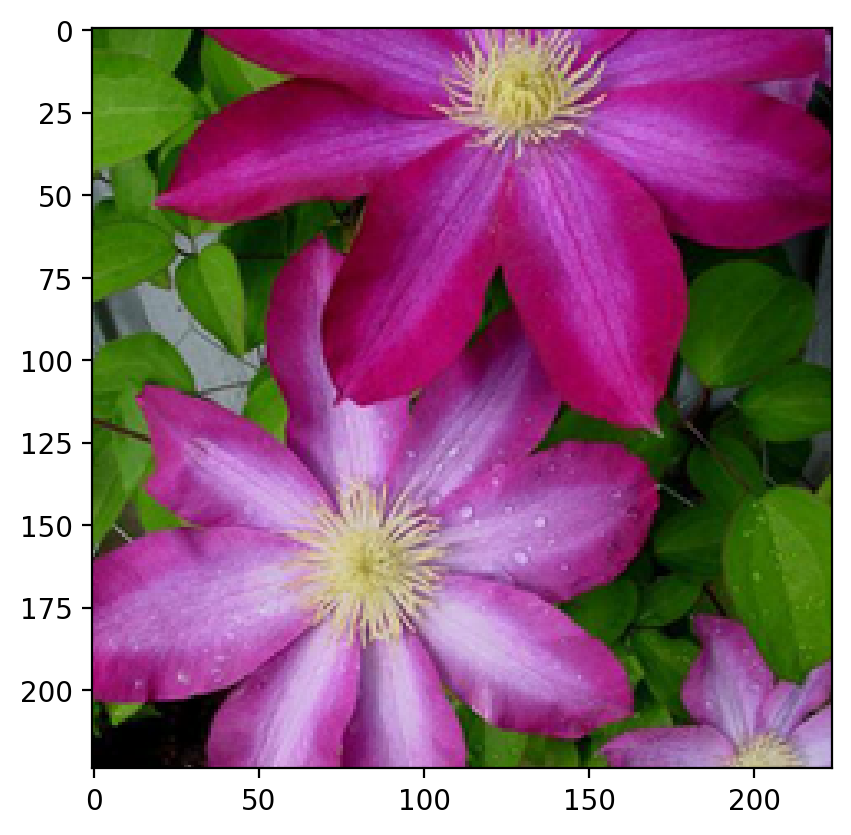

In [37]:
def imshow(image, ax=None, title=None):
    if ax is None:
        fig, ax = plt.subplots()
    image = np.array (image)
    image = image.transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    image = np.clip(image, 0, 1)    
    ax.imshow(image)    
    return ax

image_path = 'dataset/test/82/image_01598.jpg'
img = process_image(image_path)
imshow(img)

In [38]:
def predict(image_file, model, topk):
    image = process_image(image_file)
    tensor_image = torch.from_numpy(image).type(torch.FloatTensor)
    tensor_image = tensor_image.unsqueeze(dim=0)
    with torch.no_grad():
        output = model.forward(tensor_image)
    output_prob = torch.exp(output)
    top_probs, top_indices = output_prob.topk(topk)
    top_probs = top_probs.numpy()[0]
    top_indices = top_indices.numpy()[0]
    mapping = {val: key for key, val in model.class_to_idx.items()}
    top_classes = [mapping[item] for item in top_indices]
    
    return top_probs, top_classes

## Prediction Function

The `file_path` is sent to the process_image function. 

The image is then displayed on the screen using imshow().

The image, the model and a variable = say 3 are sent to the predict function. The function returns 3 probabilities and classes. then the probabilities and the flower names are plotted. The class with the highest probability is the main flower the model predicts.

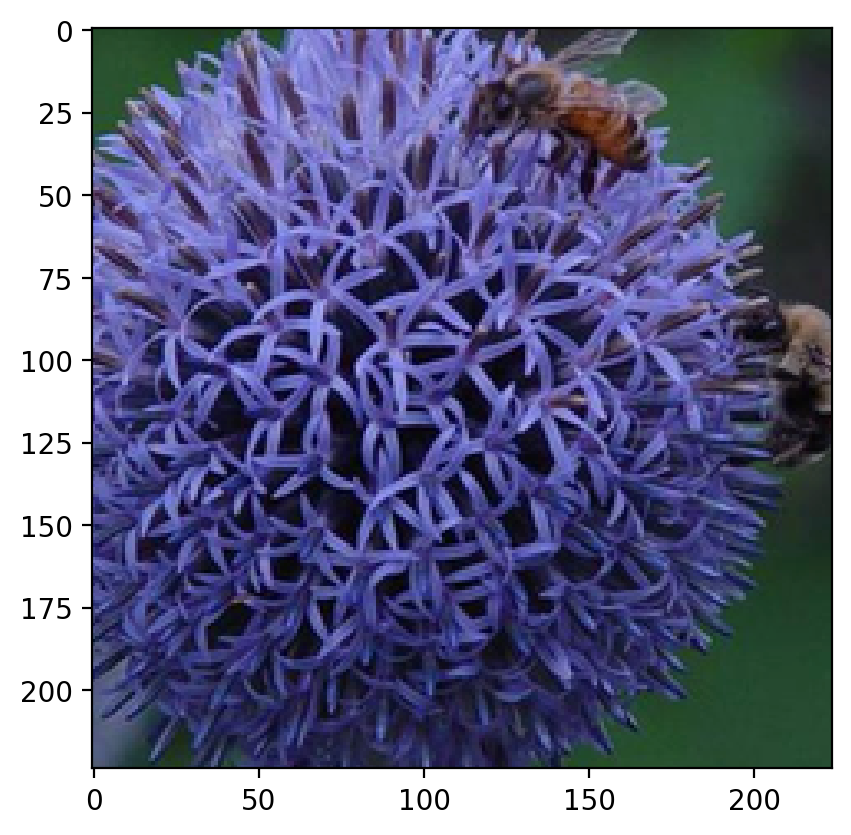

['10']
The Flower is  ['globe thistle']


In [39]:
model = model_verify 
file_path = 'dataset/test/10/image_07090.jpg' 
img = process_image (file_path)
imshow (img)
plt.show()
probs, classes = predict (file_path, model, 1)
print(classes)
class_names = [cat_to_name [item] for item in classes]

print("The Flower is ", class_names)

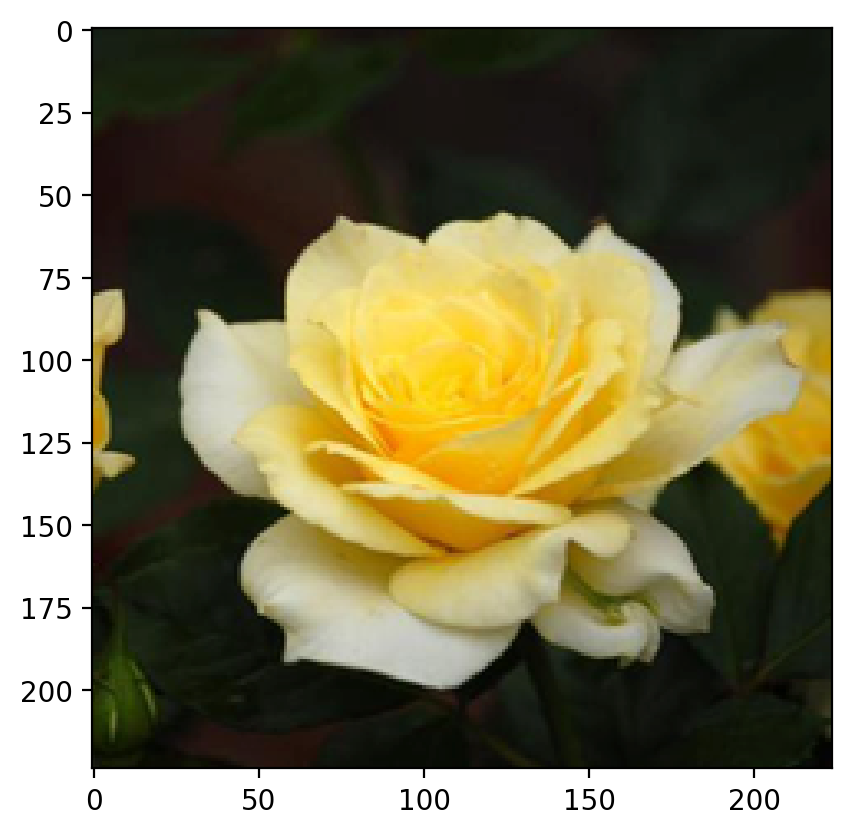

/Users/Python/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


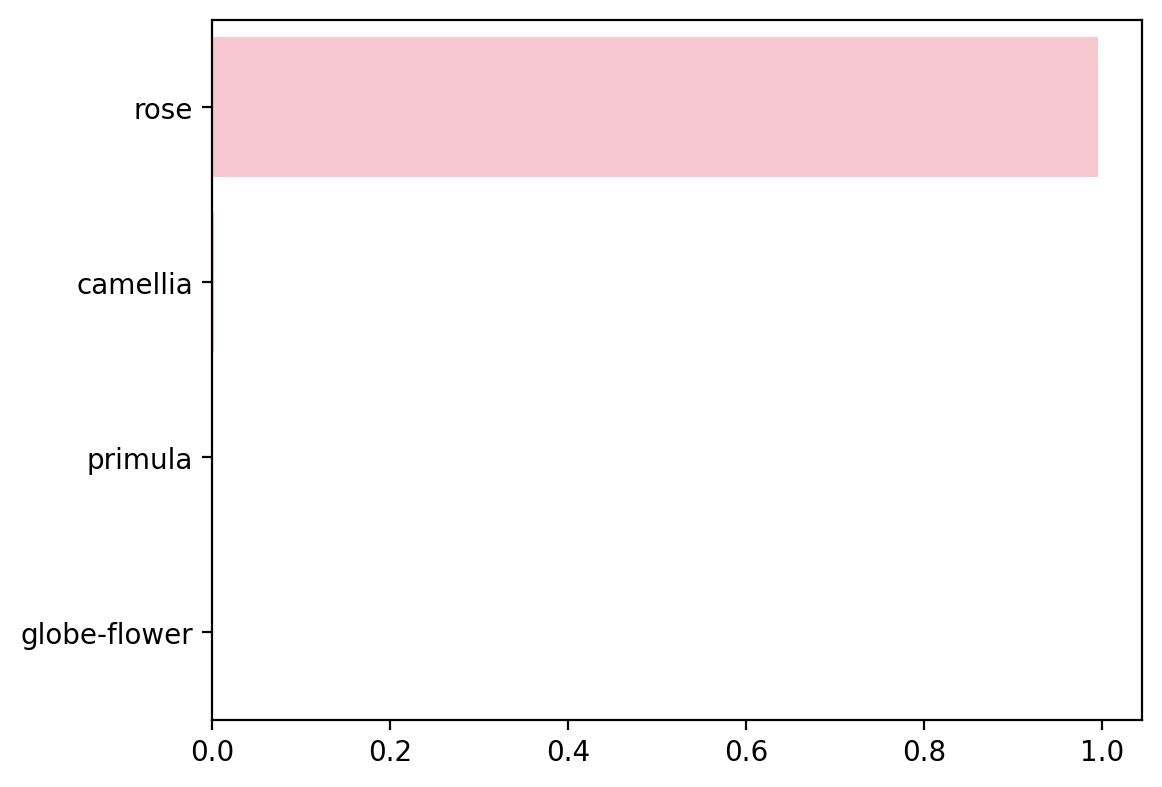

In [40]:
file_path = 'dataset/test/74/image_01165.jpg' 
img = process_image (file_path)
imshow (img)
plt.show()
probs, classes = predict (file_path, model, 4)
class_names = [cat_to_name [item] for item in classes]
plt.figure(figsize = (6,10))
plt.subplot(2,1,2)

sns.barplot(x=probs, y=class_names, color= 'pink');
plt.show()

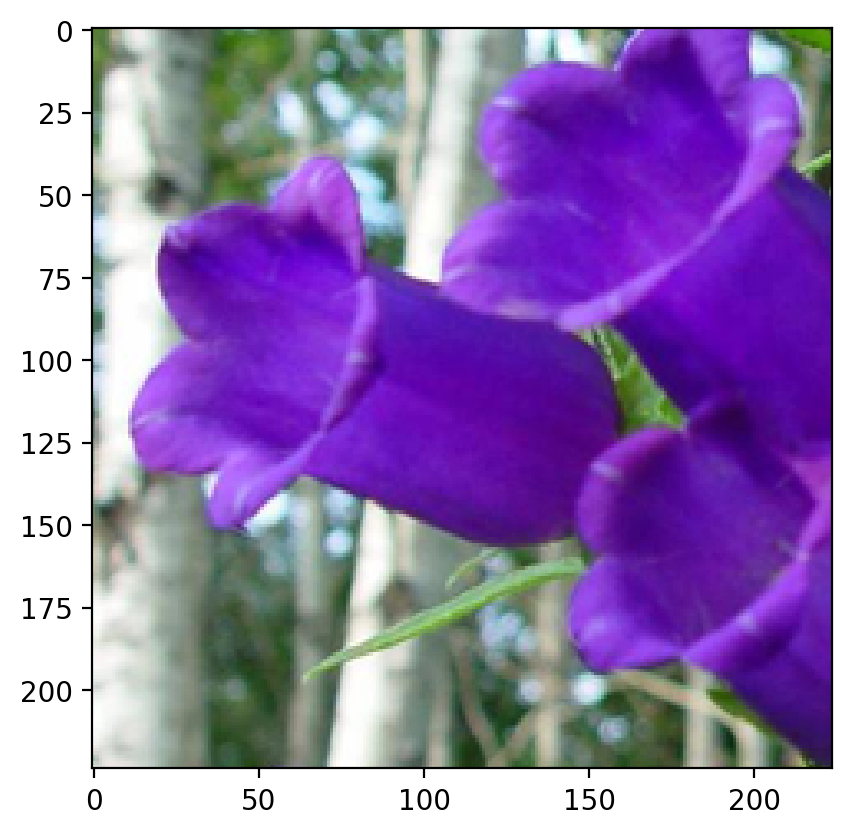

/Users/Python/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


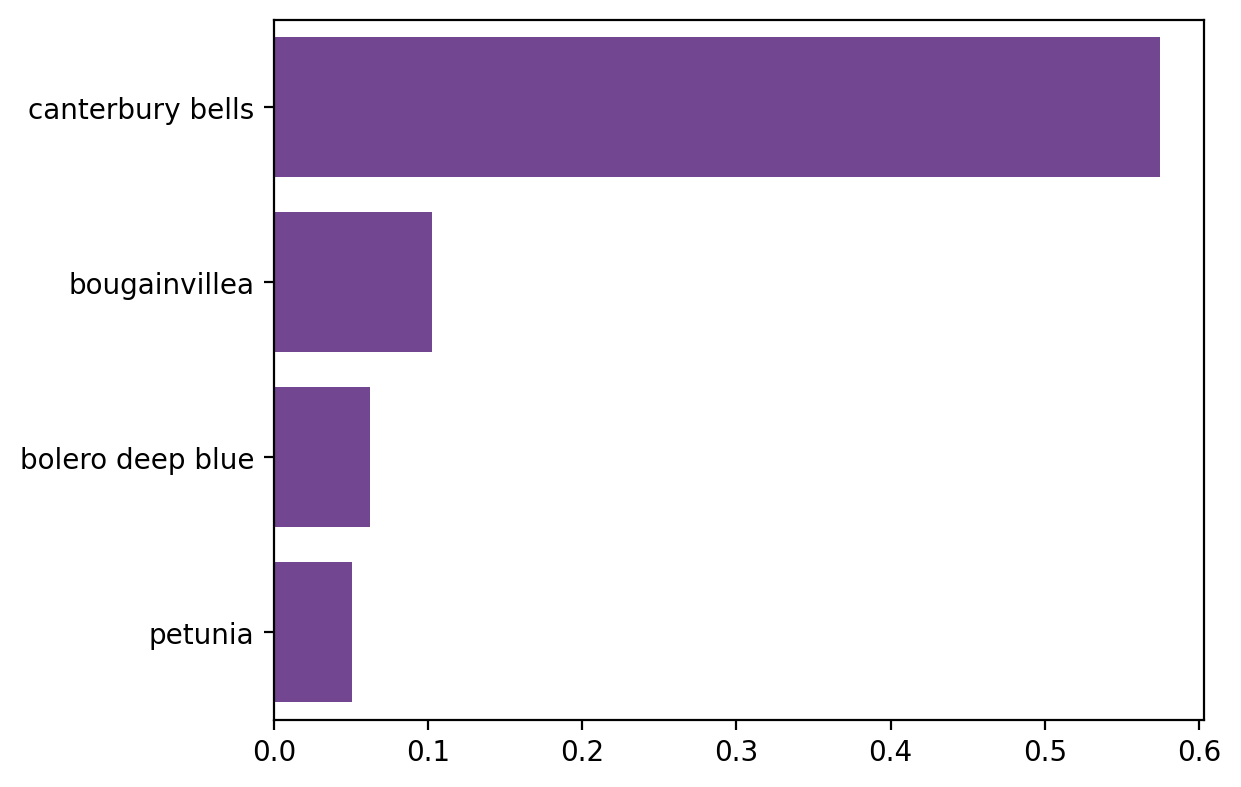

In [113]:
file_path = 'dataset/test/3/image_06641.jpg' 
img = process_image (file_path)
imshow (img)
plt.show()
probs, classes = predict (file_path, model, 4)
class_names = [cat_to_name [item] for item in classes]
plt.figure(figsize = (6,10))
plt.subplot(2,1,2)

sns.barplot(x=probs, y=class_names, color= '#74399e');
plt.show()

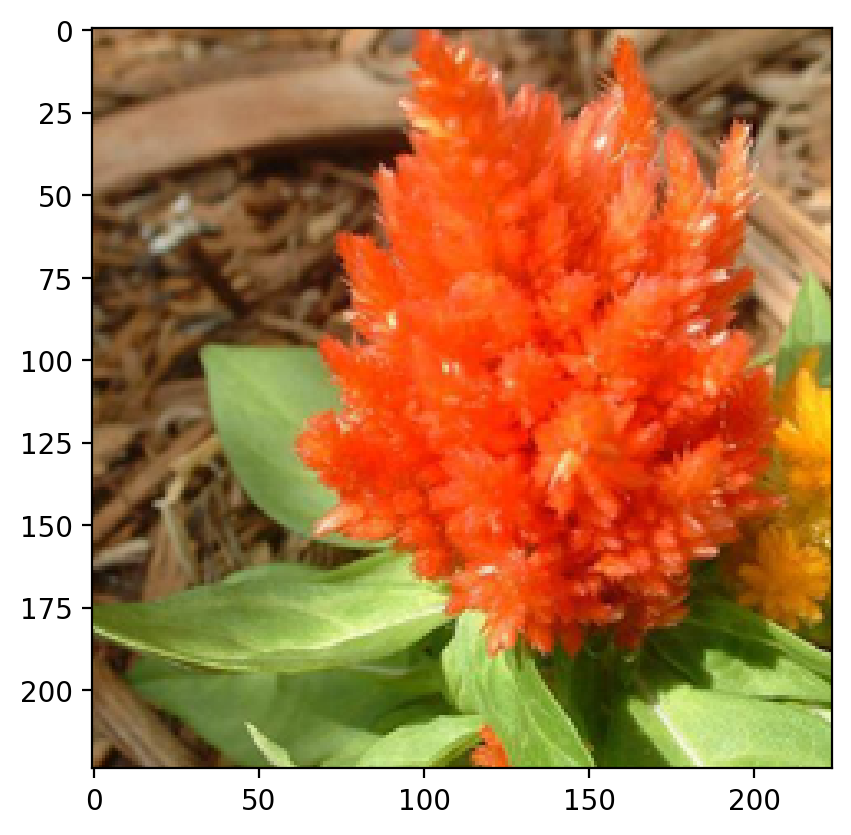

/Users/Python/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


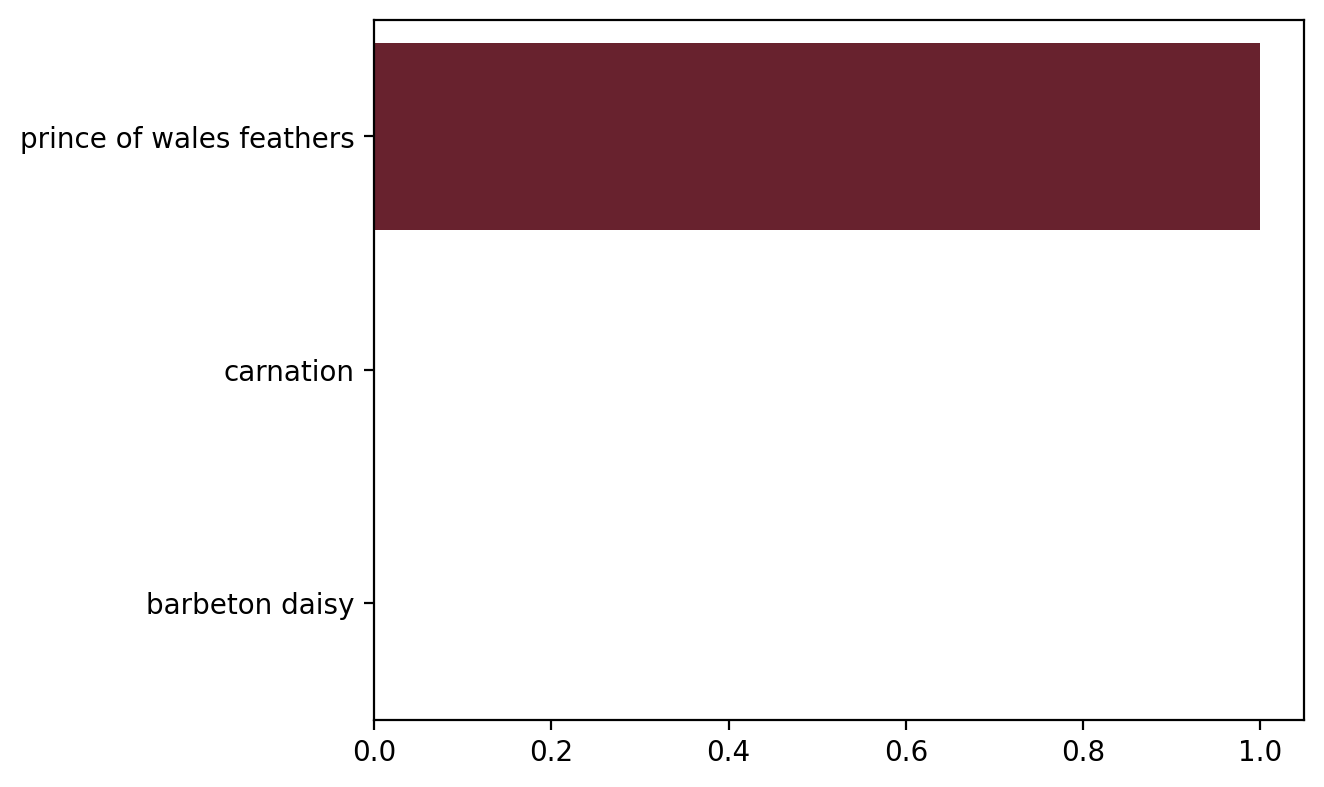

In [115]:
file_path = 'dataset/test/27/image_06887.jpg' 
img = process_image (file_path)
imshow (img)
plt.show()
probs, classes = predict (file_path, model, 3)
class_names = [cat_to_name [item] for item in classes]
plt.figure(figsize = (6,10))
plt.subplot(2,1,2)

sns.barplot(x=probs, y=class_names, color= '#731726');
plt.show()

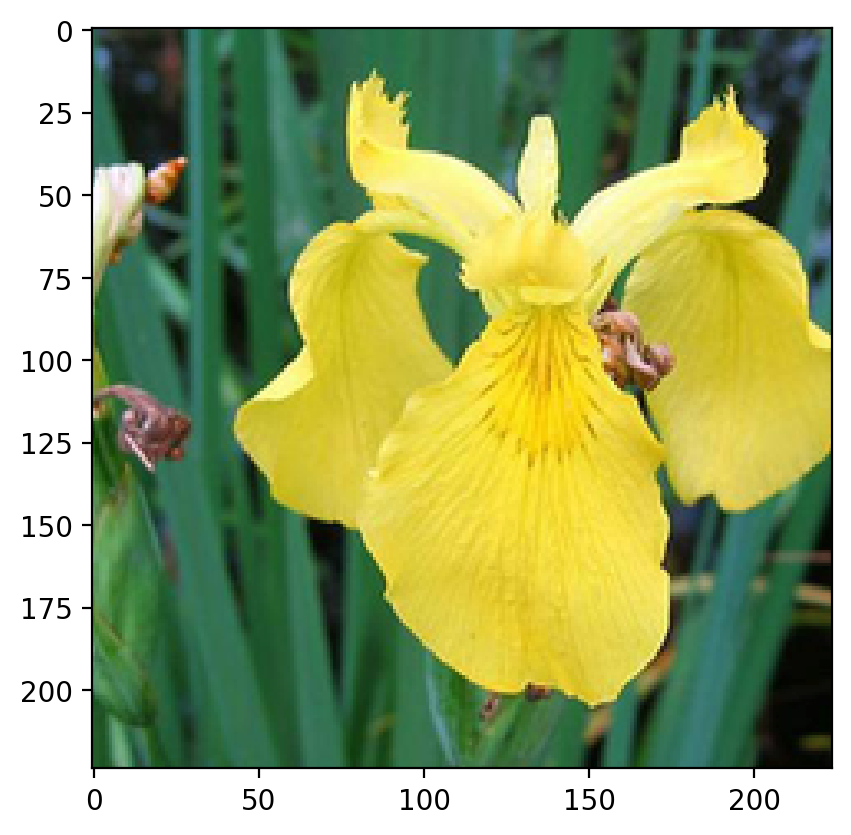

/Users/Python/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


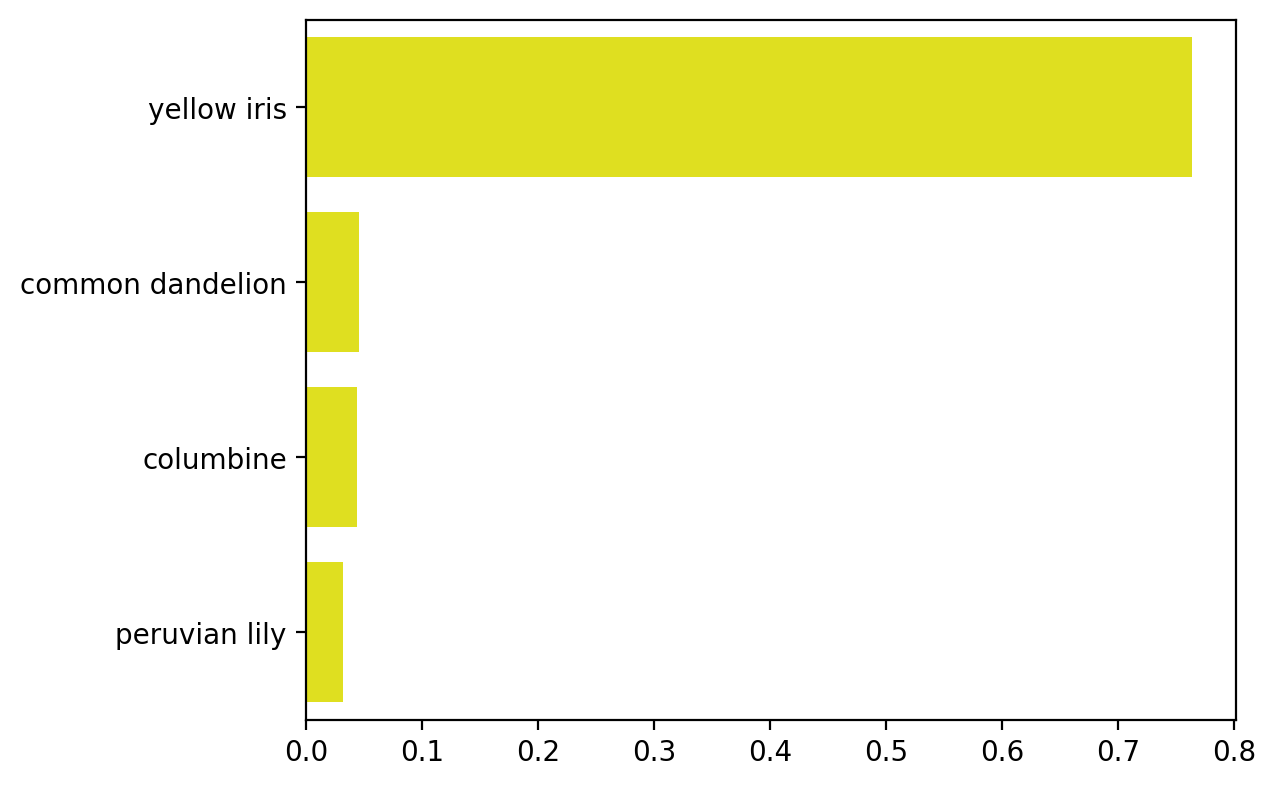

In [111]:
file_path = 'dataset/test/15/image_06369.jpg' 
img = process_image (file_path)
imshow (img)
plt.show()
probs, classes = predict (file_path, model, 4)
class_names = [cat_to_name [item] for item in classes]
plt.figure(figsize = (6,10))
plt.subplot(2,1,2)

sns.barplot(x=probs, y=class_names, color= 'yellow');
plt.show()

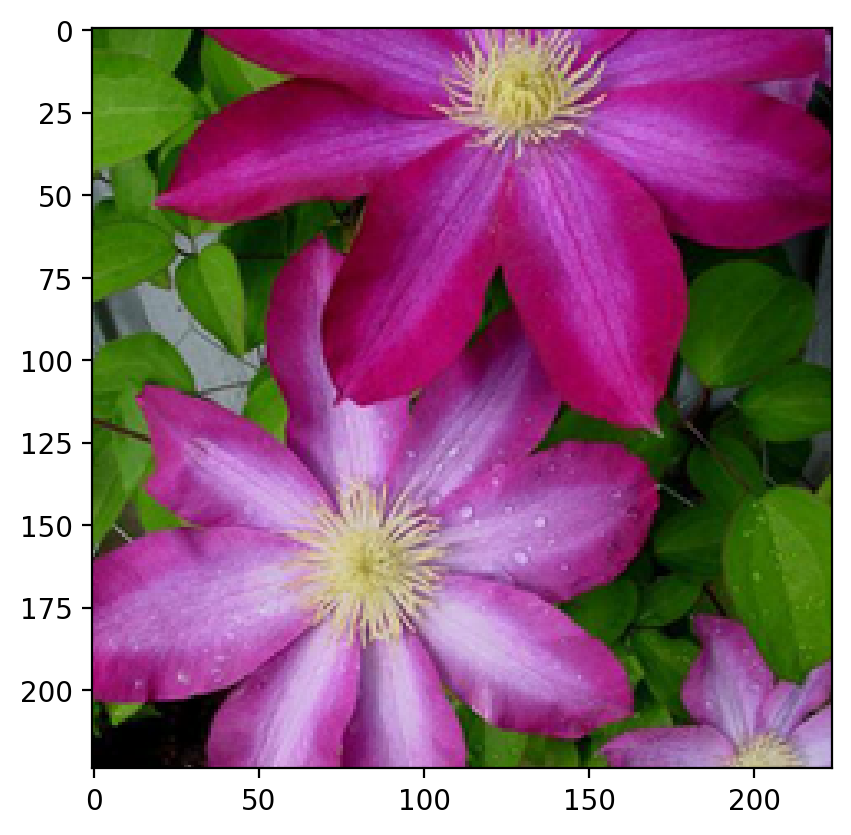

/Users/Python/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


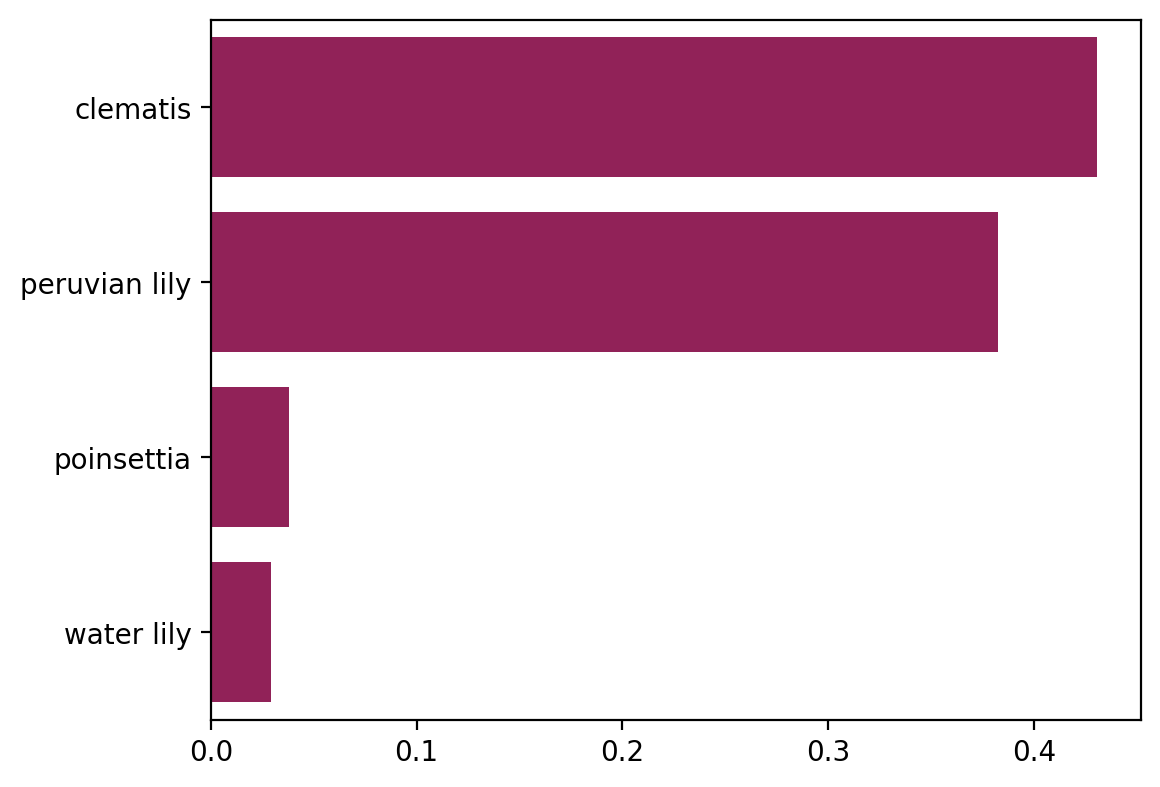

In [116]:
file_path = 'dataset/test/82/image_01598.jpg'
img = process_image (file_path)
imshow (img)
plt.show()
probs, classes = predict (file_path, model, 4)
class_names = [cat_to_name [item] for item in classes]
plt.figure(figsize = (6,10))
plt.subplot(2,1,2)

sns.barplot(x=probs, y=class_names, color= '#a31057');
plt.show()

### Get Predictions and Labels
This function computes predictions and get truth labels for a given model and data loader.

- **Input**: 
  - `model`: The trained model for making predictions.
  - `dataloader`: A DataLoader containing the test dataset.

- **Output**: 
  - `all_predictions`: A list containing predicted class labels for all samples.
  - `all_labels`: A list containing ground truth class labels for all samples.
  - These two labels are used to calculate the evaluation metrics.

## Evaluation Metrics:
The following evaluation metrics are calculated using the predicted labels and ground truth labels:

#### Accuracy:
- **Definition**: Accuracy is the proportion of correctly classified samples among the total samples.

#### Precision:
- **Definition**: Precision is the proportion of correctly classified positive samples among all samples predicted as positive.

#### Recall:
- **Definition**: Recall is the proportion of correctly classified positive samples among all actual positive samples.

#### F1 Score:
- **Definition**: F1 Score is the harmonic mean of precision and recall.

#### Confusion Matrix:
- **Definition**: A confusion matrix is a table that summarizes the performance of a classification model.


#### Note
Metrics like MAE, RMSE, R2 are metrics for regression where the target variable is continuous. So these metrics are not applicable for Image Classifiers. 

In [118]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def get_predictions_and_labels(model, dataloader):
    all_predictions = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_predictions.extend(predicted.tolist())
            all_labels.extend(labels.tolist())
    return all_predictions, all_labels


test_predictions, test_labels = get_predictions_and_labels(model, test_loader)

accuracy = accuracy_score(test_labels, test_predictions)
print("\n\nThe Accuracy is: ", accuracy)

precision = precision_score(test_labels, test_predictions, average='weighted')
print("\n\nThe Precision is: ", precision)

recall = recall_score(test_labels, test_predictions, average='weighted')
print("\n\nThe Recall is: ", recall)

f1 = f1_score(test_labels, test_predictions, average='weighted')
print("\n\nThe F1 score: ", f1)

conf_matrix = confusion_matrix(test_labels, test_predictions)
print("\n\nThe Confusion Matrix", conf_matrix)



The Accuracy is:  0.8016726403823178


The Precision is:  0.8285770624756453


The Recall is:  0.8016726403823178


The F1 score:  0.7972059565373697


The Confusion Matrix [[8 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 8 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 6]]


## Creating A Pickle File

In [41]:
import pickle

In [42]:
with open('model_pickle.pkl','wb') as f:
    pickle.dump(model,f)

In [43]:
with open('model_pickle.pkl','rb') as f:
    test_model = pickle.load(f)

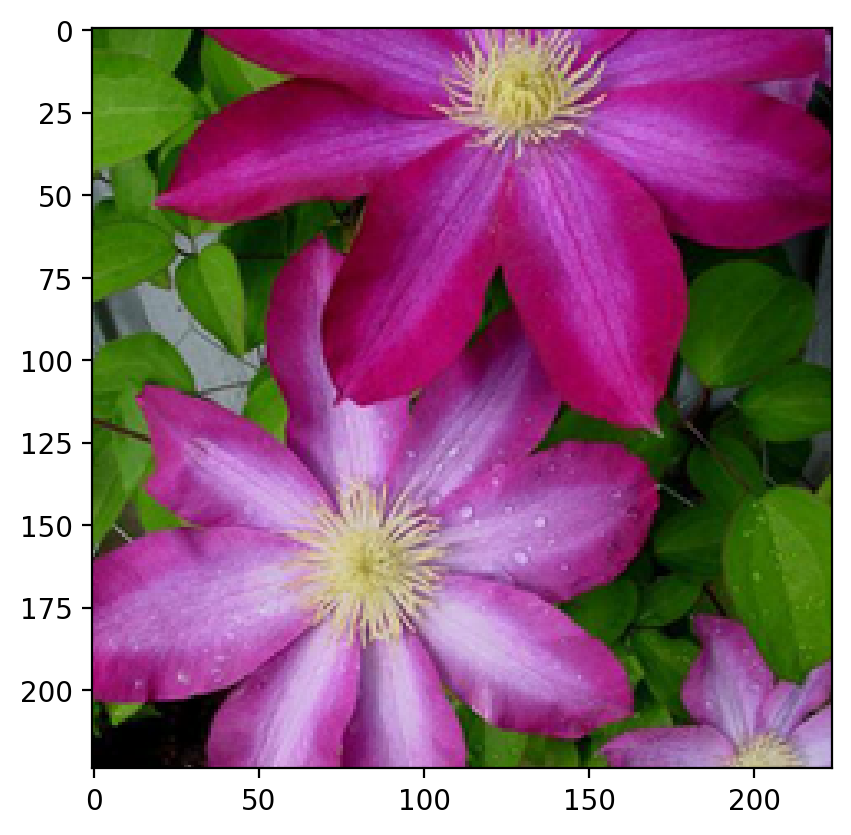

/Users/Python/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


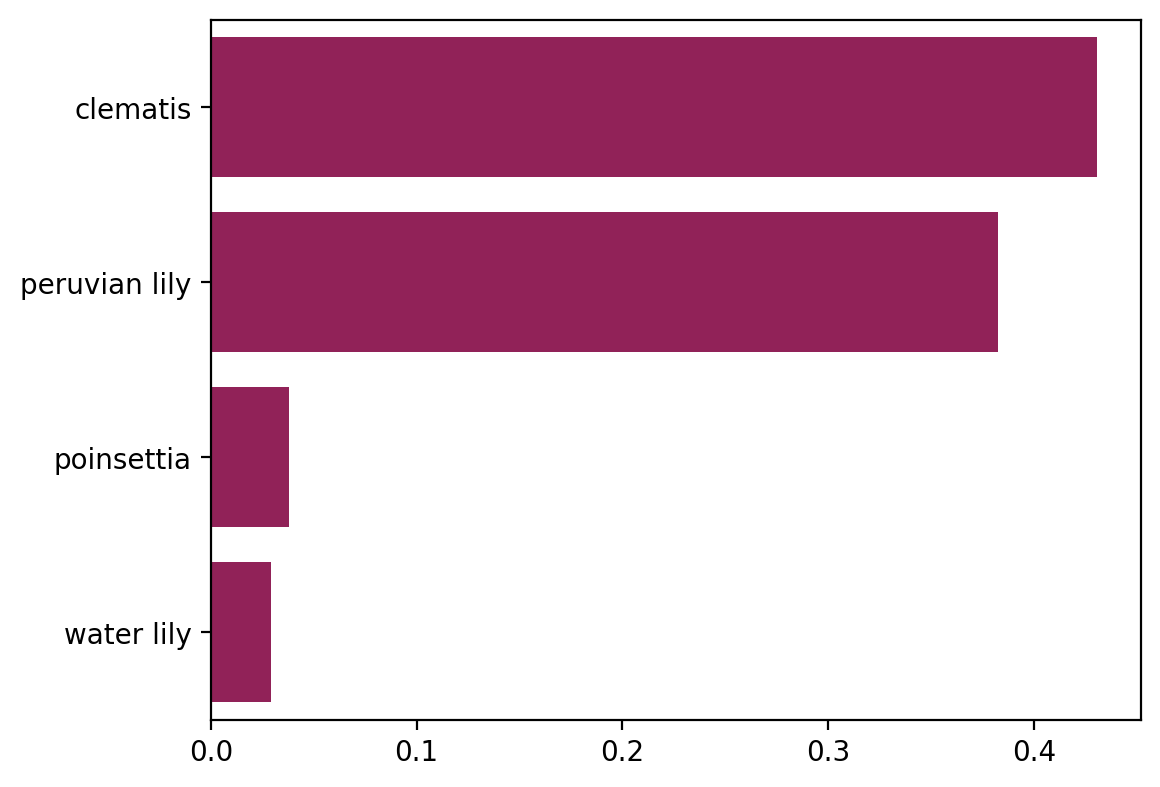

In [44]:
file_path = 'dataset/test/82/image_01598.jpg'
img = process_image (file_path)
imshow (img)
plt.show()
probs, classes = predict (file_path, test_model, 4)
class_names = [cat_to_name [item] for item in classes]
plt.figure(figsize = (6,10))
plt.subplot(2,1,2)

sns.barplot(x=probs, y=class_names, color= '#a31057');
plt.show()